# APEX Gun, IMPACT-T

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
# Nicer plotting
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,4)

In [3]:
from impact import Impact
from distgen import Generator

import matplotlib.pyplot as plt
import os

In [4]:
IMPACT_IN = '../templates/apex_gun/ImpactT.in'
DISTGEN_IN = '../templates/apex_gun/distgen.yaml'
os.path.exists(IMPACT_IN)

True

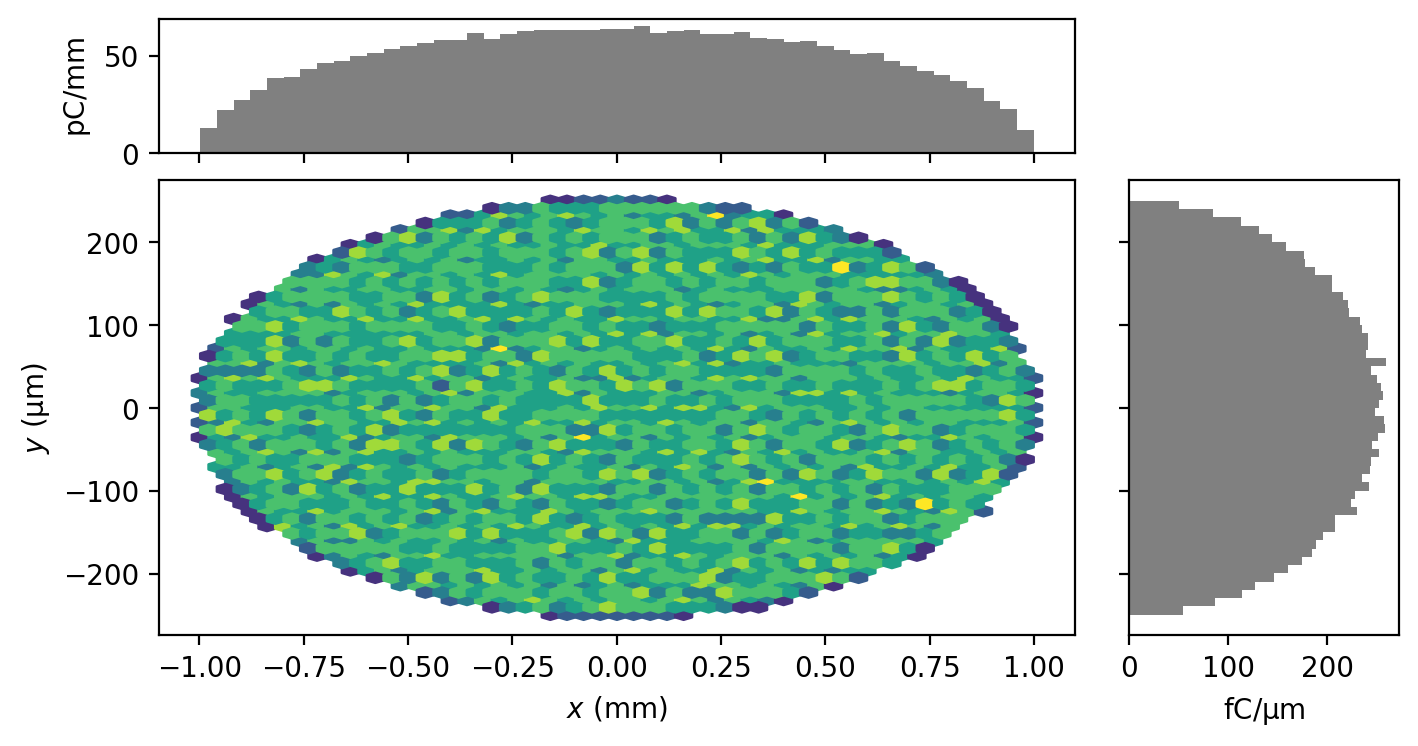

In [5]:
G = Generator(DISTGEN_IN)
G['n_particle'] = 10000

G.run()
P0 = G.particles
factor = 2
P0.x *= factor  
P0.y *= 1/factor 
P0.plot('x', 'y')

In [6]:
P0['charge']

1.0000000000000004e-10

In [7]:
# Make Impact object
I = Impact(IMPACT_IN)

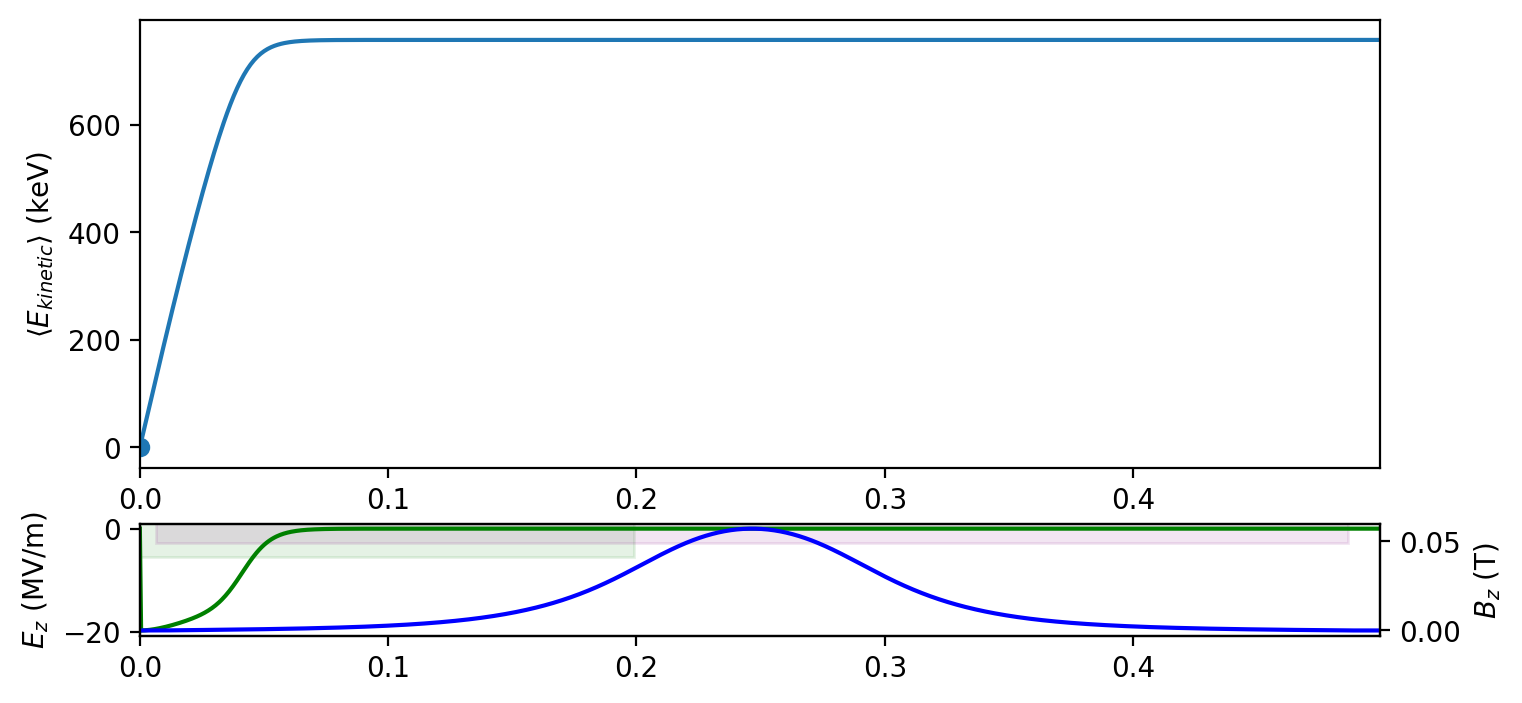

In [8]:
I.track1()
I.plot('mean_kinetic_energy')

In [9]:
I.initial_particles = P0

# Change some things
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 32
I.header['Dt'] = 1e-13

I.total_charge = P0['charge']
#I.total_charge = 0

# Other switches
I.timeout = 1000

# Change stop location
I.stop = 0.15

# Switches for MPI
I.numprocs=8

In [10]:
%%time
I.run()
print(I)

================ Impact-T Summary ================    
10000 particles
1 bunch of electrons
total charge: 100.00000000000004 pC
Distribution type: read
Cathode start at z = 0 m
   emission time: 5.064308571009823e-11 s
   image charges neglected after z = 0.02 m
Processor domain: 2 x 4 = 8 CPUs
Space charge grid: 32 x 32 x 32
Maximum time steps: 1000000
Reference Frequency: 1300000000.0 Hz
Initial reference time: -2.5403549006681165e-11 s
Simulation starting from the beginning
Impact-T finished in /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmp241afztx
CPU times: user 392 ms, sys: 167 ms, total: 558 ms
Wall time: 36.7 s


# Particles

In [11]:
# Particles are automatically parsed in to openpmd-beamphysics ParticleGroup objects
I.output['particles']

{'initial_particles': <ParticleGroup with 10000 particles at 0x104c24700>,
 'final_particles': <ParticleGroup with 10000 particles at 0x168d7c580>}

In [12]:
# Get the final particles, calculate some statistic
P = I.output['particles']['final_particles']
P['mean_energy']

1269378.474966081

In [13]:
# Show the units
P.units('mean_energy')

pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0))

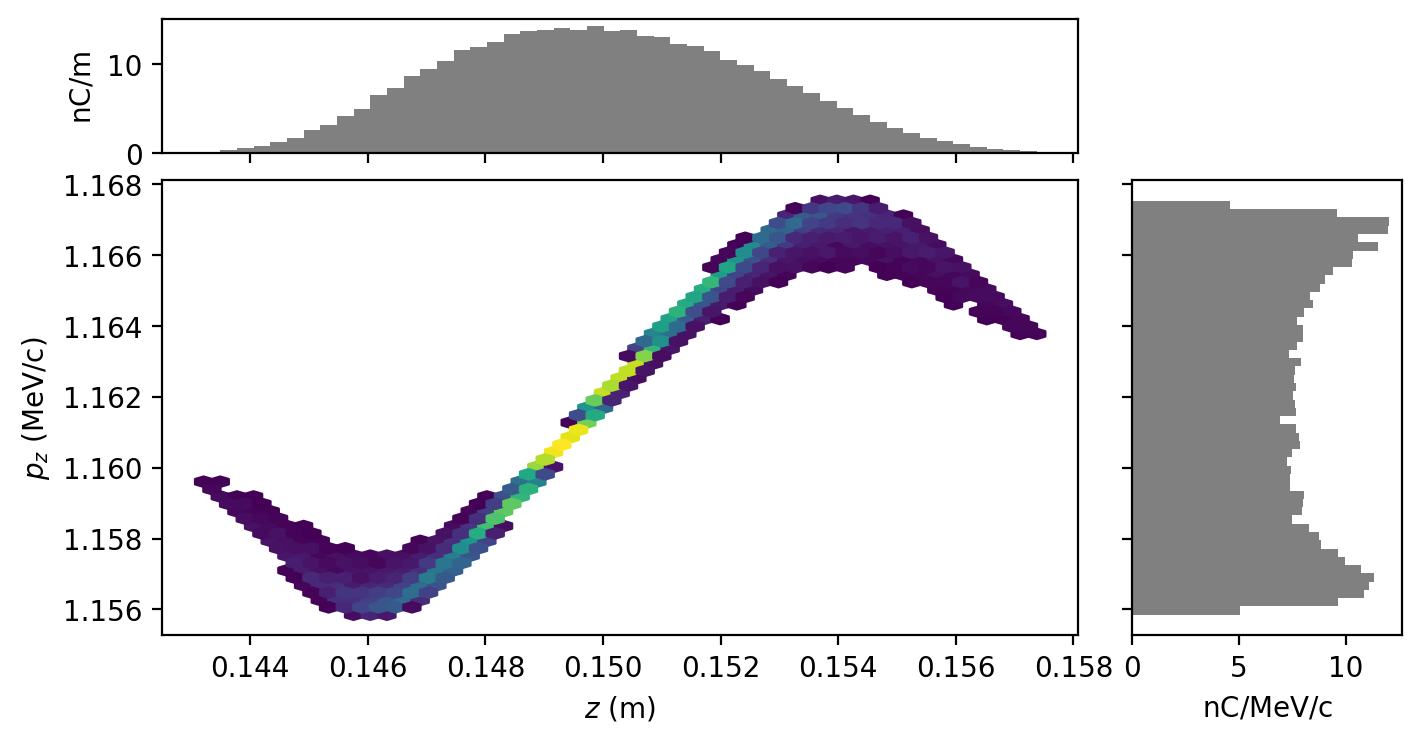

In [14]:
P.plot('z', 'pz')

# Stats

In [15]:
# Impact's own calculated statistics can be retieved
len(I.stat('norm_emit_x')), I.stat('norm_emit_x')[-1]

(1242, 1.479724e-05)

In [16]:
# Stats can also be computed from the particles. For example:
I.particles['final_particles']['norm_emit_x']

1.4798894808846349e-05

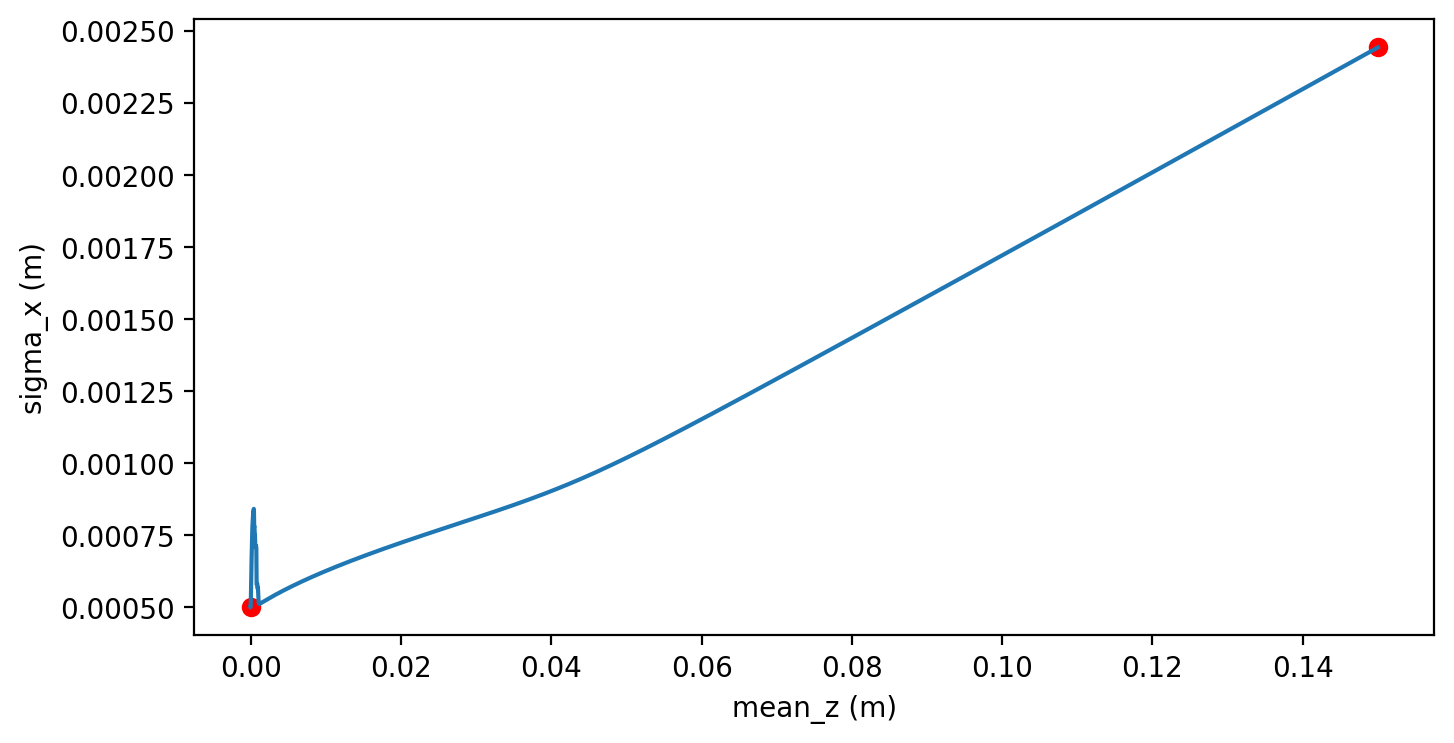

In [17]:
# Compare these. 
key1 = 'mean_z'
key2 = 'sigma_x'
units1 = str(I.units(key1))
units2 = str(I.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(I.stat(key1), I.stat(key2))
plt.scatter(
    [I.particles[name][key1] for name in I.particles], 
    [I.particles[name][key2] for name in I.particles], color='red')